In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import IPython
import mlflow

In [2]:
!pwd

/c/Users/yacin/Desktop/DATA SCIENCE OPENCLASSROOMS/Projet 13/notebook


In [3]:
calendar = pd.read_csv('../datasets/calendar.csv', sep=',')

In [4]:
sales = pd.read_csv('../datasets/sales_train_validation.csv', sep=',')

In [5]:
sell_prices = pd.read_csv('../datasets/sell_prices.csv', sep=',')

In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [8]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [9]:
#Exploration des données 

In [10]:
calendar[['date', 'year', 'month', 'weekday', 'wday']].head()

,date,year,month,weekday,wday
0,2011-01-29,2011,1,Saturday,1
1,2011-01-30,2011,1,Sunday,2
2,2011-01-31,2011,1,Monday,3
3,2011-02-01,2011,2,Tuesday,4
4,2011-02-02,2011,2,Wednesday,5


In [11]:
calendar[['event_name_1', 'event_type_1']].dropna().head()

,event_name_1,event_type_1
8,SuperBowl,Sporting
16,ValentinesDay,Cultural
23,PresidentsDay,National
39,LentStart,Religious
46,LentWeek2,Religious


In [12]:
calendar['date'].duplicated().sum()

np.int64(0)

In [13]:
sales[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].head()

,id,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


In [14]:
sales.filter(regex="^d_").shape

(30490, 1913)

In [15]:
sales['state_id'].value_counts()

state_id
CA    12196
TX     9147
WI     9147
Name: count, dtype: int64

In [16]:
sales.filter(regex="^d_").sum(axis=1).describe()

count     30490.000000
mean       2154.654280
std        5217.226438
min          10.000000
25%         355.000000
50%         848.000000
75%        2031.750000
max      250502.000000
dtype: float64

le volume total vendu sur 1913 jours pour chaque couple produit × magasin

mean ≈ 2 155

En moyenne, un produit-magasin a vendu ~2 155 unités sur 5 ans

Soit ≈ 1,1 unité par jour
✔ Très réaliste pour du retail

In [17]:
sales_ca = sales[sales['state_id'] == 'CA']

In [18]:
sales_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12196 entries, 0 to 12195
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 178.7+ MB


In [19]:
sales_columns = sales_ca.filter(regex="^d_")

sales_columns.shape

(12196, 1913)

In [20]:
sales_columns.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [21]:
daily_sales_ca = sales_columns.sum(axis=0).reset_index()
daily_sales_ca.columns = ["d", "sales"]

daily_sales_ca.head()

,d,sales
0,d_1,14195
1,d_2,13805
2,d_3,10108
3,d_4,11047
4,d_5,9925


In [22]:
daily_sales_ca.describe()

,sales
count,1913.000000
mean,14989.831155
std,3257.223505
min,5.000000
25%,12834.000000
50%,14678.000000
75%,16846.000000
max,25224.000000


### Agrégation des ventes en Californie

Les ventes ont été filtrées sur l’État de Californie, puis agrégées par jour afin d’obtenir une série temporelle unique représentant le volume total des ventes quotidiennes. Cette agrégation permet de réduire la variabilité liée aux produits individuels et de faciliter la modélisation.


In [23]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [24]:
calendar_cols = [
    "d",
    "date",
    "wday",
    "month",
    "year",
    "event_name_1",
    "event_name_2"
]

calendar_small = calendar[calendar_cols]
calendar_small.head()

,d,date,wday,month,year,event_name_1,event_name_2
0,d_1,2011-01-29,1,1,2011,NaN,NaN
1,d_2,2011-01-30,2,1,2011,NaN,NaN
2,d_3,2011-01-31,3,1,2011,NaN,NaN
3,d_4,2011-02-01,4,2,2011,NaN,NaN
4,d_5,2011-02-02,5,2,2011,NaN,NaN


In [25]:
daily_sales_ca = daily_sales_ca.merge(
    calendar_small,
    on = 'd',
    how='left'
)

In [26]:
daily_sales_ca

,d,sales,date,wday,month,year,event_name_1,event_name_2
0,d_1,14195,2011-01-29,1,1,2011,NaN,NaN
1,d_2,13805,2011-01-30,2,1,2011,NaN,NaN
2,d_3,10108,2011-01-31,3,1,2011,NaN,NaN
3,d_4,11047,2011-02-01,4,2,2011,NaN,NaN
4,d_5,9925,2011-02-02,5,2,2011,NaN,NaN
...,...,...,...,...,...,...,...,...
1908,d_1909,15148,2016-04-20,5,4,2016,NaN,NaN
1909,d_1910,14488,2016-04-21,6,4,2016,NaN,NaN
1910,d_1911,17095,2016-04-22,7,4,2016,NaN,NaN
1911,d_1912,21834,2016-04-23,1,4,2016,NaN,NaN


In [27]:
daily_sales_ca.isna().sum()

d                  0
sales              0
date               0
wday               0
month              0
year               0
event_name_1    1759
event_name_2    1909
dtype: int64

In [28]:
daily_sales_ca['date'] = pd.to_datetime(daily_sales_ca['date'])

In [29]:
daily_sales_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   d             1913 non-null   object        
 1   sales         1913 non-null   int64         
 2   date          1913 non-null   datetime64[ns]
 3   wday          1913 non-null   int64         
 4   month         1913 non-null   int64         
 5   year          1913 non-null   int64         
 6   event_name_1  154 non-null    object        
 7   event_name_2  4 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 119.7+ KB


### Jointure avec le calendrier

Les ventes quotidiennes agrégées ont été enrichies à l’aide du fichier `calendar.csv`, permettant d’associer chaque jour de vente à une date réelle ainsi qu’à des informations calendaires (jour de la semaine, mois, année, événements). Cette étape est essentielle pour capturer les effets de saisonnalité dans la modélisation.

In [30]:
daily_sales_ca["is_weekend"] = daily_sales_ca["wday"].isin([1, 2]).astype(int)

In [31]:
daily_sales_ca["is_event"] = (
    daily_sales_ca["event_name_1"].notna() |
    daily_sales_ca["event_name_2"].notna()
).astype(int)

In [32]:
daily_sales_ca.drop(
    columns=["event_name_1", "event_name_2"],
    inplace=True
)

### Création des features temporelles

Des variables temporelles simples ont été créées à partir du calendrier afin de capturer les effets de saisonnalité et de comportement d’achat. Ces variables sont connues à l’avance et facilement interprétables par les équipes métier.

In [33]:
daily_sales_ca = daily_sales_ca.sort_values("date").reset_index(drop=True)

In [37]:
daily_sales_ca

,d,sales,date,wday,month,year,is_weekend,is_event,sales_lag_7,sales_rolling_mean_7
0,d_1,14195,2011-01-29,1,1,2011,1,0,NaN,NaN
1,d_2,13805,2011-01-30,2,1,2011,1,0,NaN,NaN
2,d_3,10108,2011-01-31,3,1,2011,0,0,NaN,NaN
3,d_4,11047,2011-02-01,4,2,2011,0,0,NaN,NaN
4,d_5,9925,2011-02-02,5,2,2011,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1908,d_1909,15148,2016-04-20,5,4,2016,0,0,14614.0,17557.714286
1909,d_1910,14488,2016-04-21,6,4,2016,0,0,15069.0,17474.714286
1910,d_1911,17095,2016-04-22,7,4,2016,0,0,16255.0,17594.714286
1911,d_1912,21834,2016-04-23,1,4,2016,1,0,20564.0,17776.142857


In [35]:
daily_sales_ca["sales_lag_7"] = daily_sales_ca["sales"].shift(7)

In [36]:
daily_sales_ca["sales_rolling_mean_7"] = (
    daily_sales_ca["sales"]
    .rolling(window=7)
    .mean()
)

### Création des features d’historique des ventes

Des variables basées sur l’historique récent des ventes ont été créées afin de capturer la dynamique de la demande. Ces variables sont calculées uniquement à partir d’informations passées, garantissant l’absence de fuite de données et leur compatibilité avec une prévision à horizon de sept jours.

In [38]:
#création de la variable cible

In [39]:
daily_sales_ca["sales_t_plus_7"] = daily_sales_ca["sales"].shift(-7)

In [41]:
final_cols = [
    "date",
    "sales",  # utile pour contrôle / graphiques
    "wday",
    "month",
    "year",
    "is_weekend",
    "is_event",
    "sales_lag_7",
    "sales_rolling_mean_7",
    "sales_t_plus_7"
]

df_model = daily_sales_ca[final_cols].copy()
df_model.head()

,date,sales,wday,month,year,is_weekend,is_event,sales_lag_7,sales_rolling_mean_7,sales_t_plus_7
0,2011-01-29,14195,1,1,2011,1,0,NaN,NaN,16610.0
1,2011-01-30,13805,2,1,2011,1,0,NaN,NaN,14696.0
2,2011-01-31,10108,3,1,2011,0,0,NaN,NaN,11822.0
3,2011-02-01,11047,4,2,2011,0,0,NaN,NaN,10933.0
4,2011-02-02,9925,5,2,2011,0,0,NaN,NaN,10350.0


In [42]:
df_model = df_model.dropna().reset_index(drop=True)
df_model.shape

(1899, 10)

In [43]:
feature_cols = [
    "wday", "month", "year",
    "is_weekend", "is_event",
    "sales_lag_7", "sales_rolling_mean_7"
]

X = df_model[feature_cols].copy()
y = df_model["sales_t_plus_7"].copy()

X.head(), y.head()

(   wday  month  year  is_weekend  is_event  sales_lag_7  sales_rolling_mean_7
 0     1      2  2011           1         0      14195.0          12152.571429
 1     2      2  2011           1         1      13805.0          12279.857143
 2     3      2  2011           0         0      10108.0          12524.714286
 3     4      2  2011           0         0      11047.0          12508.428571
 4     5      2  2011           0         0       9925.0          12569.142857,
 0    14610.0
 1    15630.0
 2     9044.0
 3     9496.0
 4     8844.0
 Name: sales_t_plus_7, dtype: float64)

### Création de la variable cible à J+7 et construction du dataset final

La variable cible a été construite en décalant les ventes de 7 jours vers le futur afin d’obtenir, pour chaque date t, la valeur des ventes observées à t+7. Les observations incomplètes dues aux décalages (lags, rolling) et à l’horizon de prédiction ont été supprimées afin d’obtenir un dataset final prêt pour l’entraînement des modèles.

In [44]:
#EDA df_model

In [45]:
df_model.shape

(1899, 10)

In [46]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1899 non-null   datetime64[ns]
 1   sales                 1899 non-null   int64         
 2   wday                  1899 non-null   int64         
 3   month                 1899 non-null   int64         
 4   year                  1899 non-null   int64         
 5   is_weekend            1899 non-null   int64         
 6   is_event              1899 non-null   int64         
 7   sales_lag_7           1899 non-null   float64       
 8   sales_rolling_mean_7  1899 non-null   float64       
 9   sales_t_plus_7        1899 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 148.5 KB


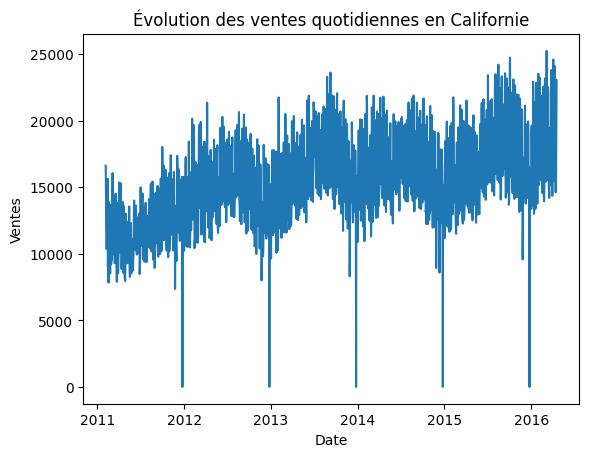

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_model["date"], df_model["sales"])
plt.title("Évolution des ventes quotidiennes en Californie")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.show()

In [48]:
df_model.groupby("is_weekend")["sales"].mean()

is_weekend
0    13662.183764
1    18301.556985
Name: sales, dtype: float64

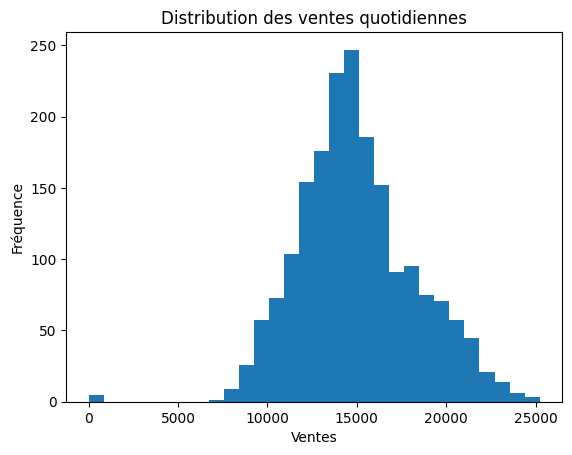

In [49]:
plt.figure()
plt.hist(df_model["sales"], bins=30)
plt.title("Distribution des ventes quotidiennes")
plt.xlabel("Ventes")
plt.ylabel("Fréquence")
plt.show()

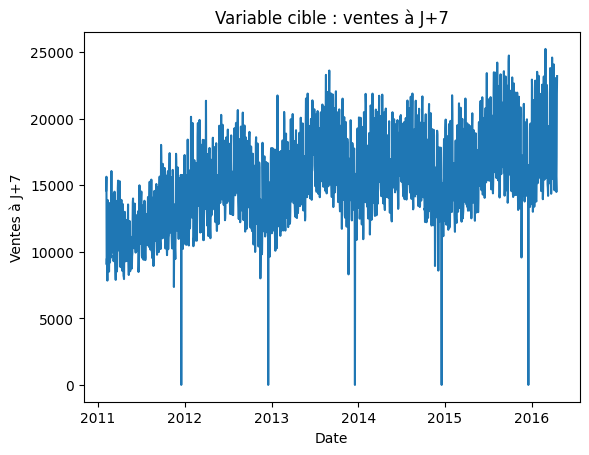

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_model["date"], df_model["sales_t_plus_7"])
plt.title("Variable cible : ventes à J+7")
plt.xlabel("Date")
plt.ylabel("Ventes à J+7")
plt.show()

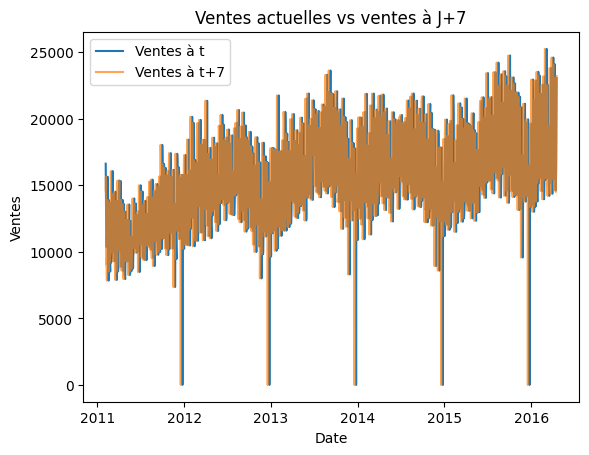

In [56]:
plt.figure()
plt.plot(df_model["date"], df_model["sales"], label="Ventes à t")
plt.plot(df_model["date"], df_model["sales_t_plus_7"], label="Ventes à t+7", alpha=0.7)
plt.legend()
plt.title("Ventes actuelles vs ventes à J+7")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.show()

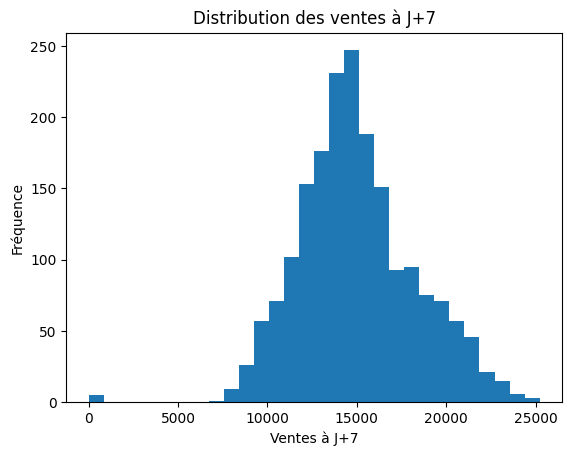

In [57]:
plt.figure()
plt.hist(df_model["sales_t_plus_7"], bins=30)
plt.title("Distribution des ventes à J+7")
plt.xlabel("Ventes à J+7")
plt.ylabel("Fréquence")
plt.show()

In [52]:
corr_cols = [
    "sales",
    "wday",
    "month",
    "year",
    "is_weekend",
    "is_event",
    "sales_lag_7",
    "sales_rolling_mean_7",
    "sales_t_plus_7"
]

corr_matrix = df_model[corr_cols].corr()
corr_matrix

,sales,wday,month,year,is_weekend,is_event,sales_lag_7,sales_rolling_mean_7,sales_t_plus_7
sales,1.000000,-0.507580,0.016941,0.475260,0.645137,-0.070199,0.836838,0.621950,0.837260
wday,-0.507580,1.000000,-0.001225,0.001562,-0.790933,-0.041070,-0.506117,0.001126,-0.507762
month,0.016941,-0.001225,1.000000,-0.168418,-0.001629,-0.072068,0.062148,0.032010,-0.011164
year,0.475260,0.001562,-0.168418,1.000000,0.000320,0.009034,0.464917,0.748637,0.477351
is_weekend,0.645137,-0.790933,-0.001629,0.000320,1.000000,0.012306,0.643874,-0.000354,0.645475
is_event,-0.070199,-0.041070,-0.072068,0.009034,0.012306,1.000000,-0.045986,-0.020188,-0.020690
sales_lag_7,0.836838,-0.506117,0.062148,0.464917,0.643874,-0.045986,1.000000,0.586413,0.808794
sales_rolling_mean_7,0.621950,0.001126,0.032010,0.748637,-0.000354,-0.020188,0.586413,1.000000,0.540932
sales_t_plus_7,0.837260,-0.507762,-0.011164,0.477351,0.645475,-0.020690,0.808794,0.540932,1.000000


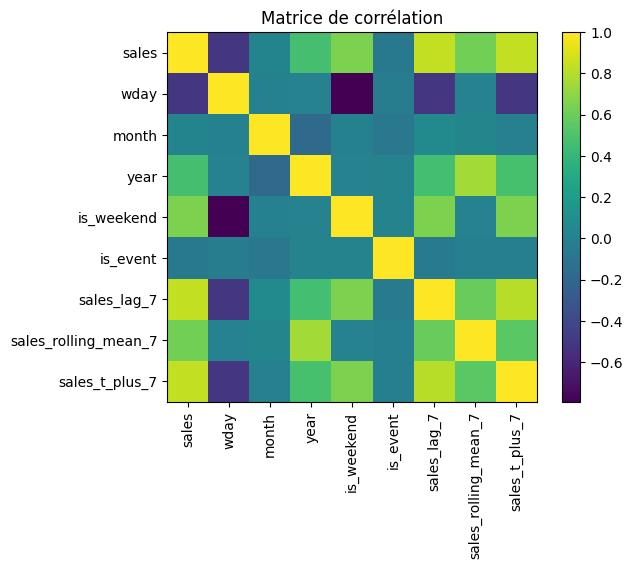

In [53]:
plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Matrice de corrélation")
plt.show()

### Analyse exploratoire des données

L’analyse exploratoire met en évidence une saisonnalité marquée des ventes ainsi qu’une forte dépendance aux ventes passées. Les variables d’historique (`sales_lag_7`, `sales_rolling_mean_7`) présentent une corrélation significative avec la variable cible, confirmant leur pertinence pour la modélisation. Les variables calendaires jouent un rôle complémentaire en capturant les effets de saisonnalité.

In [58]:
#Modèle baseline

In [59]:
# Prédictions naïves : ventes à J-7
y_pred_naive = X["sales_lag_7"]

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_naive = mean_absolute_error(y, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y, y_pred_naive))

mae_naive, rmse_naive

(1456.8404423380728, np.float64(2011.6777786196528))

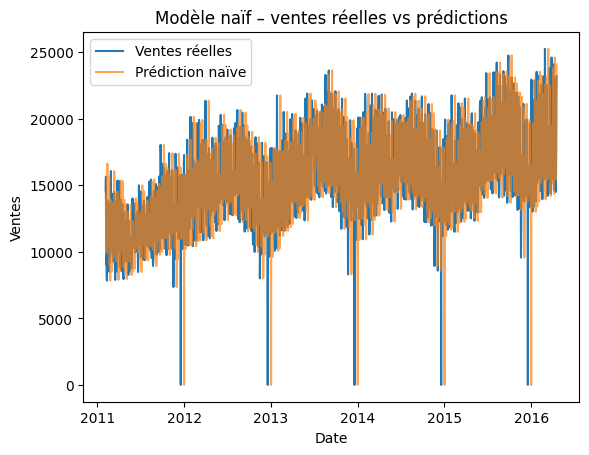

In [61]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_model["date"], y, label="Ventes réelles")
plt.plot(df_model["date"], y_pred_naive, label="Prédiction naïve", alpha=0.7)
plt.legend()
plt.title("Modèle naïf – ventes réelles vs prédictions")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.show()

In [ ]:
### Modèle naïf (baseline)

Un modèle naïf a été implémenté comme référence, consistant à prédire les ventes à J+7 à partir des ventes observées à J-7. Ce modèle permet d’évaluer le gain réel apporté par des approches plus complexes.

« En moyenne, le modèle naïf se trompe d’environ 1 450 unités de ventes par jour, avec des erreurs plus importantes lors des pics, comme le montre la RMSE. »

In [62]:
#test modèle reg linéaire

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

linreg_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

In [65]:
linreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [66]:
y_pred_linreg = linreg_pipeline.predict(X_test)

In [67]:
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
rmse_linreg = np.sqrt(mean_squared_error(y_test, y_pred_linreg))

mae_linreg, rmse_linreg

(1230.9694793057763, np.float64(1734.3374314226674))

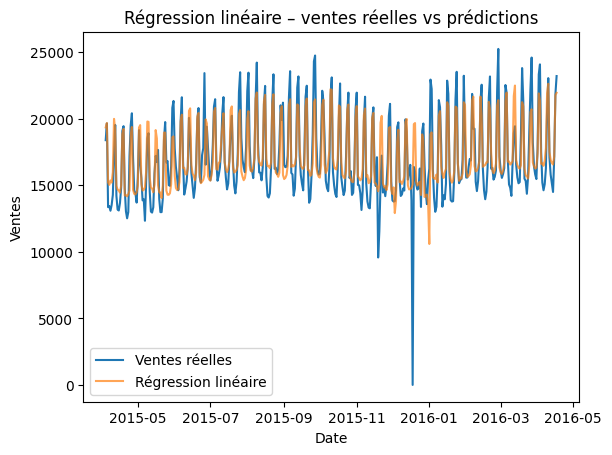

In [68]:
plt.figure()
plt.plot(df_model["date"].iloc[y_test.index], y_test, label="Ventes réelles")
plt.plot(df_model["date"].iloc[y_test.index], y_pred_linreg, label="Régression linéaire", alpha=0.7)
plt.legend()
plt.title("Régression linéaire – ventes réelles vs prédictions")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.show()

In [69]:
import pandas as pd

coefficients = pd.Series(
    linreg_pipeline.named_steps["model"].coef_,
    index=feature_cols
).sort_values()

coefficients

is_event                 -22.608830
month                    -22.191515
wday                      33.177961
year                     380.842933
sales_rolling_mean_7     810.183743
sales_lag_7              934.703307
is_weekend              1429.785691
dtype: float64

« La régression linéaire améliore significativement les performances par rapport au modèle naïf, avec une réduction d’environ 15 % de l’erreur moyenne. Ces résultats montrent l’intérêt de combiner les informations calendaires et l’historique des ventes. »

« L’analyse des coefficients du modèle de régression linéaire met en évidence le rôle central de l’historique des ventes et du comportement week-end dans la prédiction des ventes à J+7. Les variables calendaires fines, telles que le mois ou les événements, jouent un rôle complémentaire mais secondaire. Ces résultats confirment la cohérence métier du modèle. »

In [88]:
#enregistrement modèle lin reg

In [90]:
import joblib
from pathlib import Path

# Dossier models
Path("models").mkdir(exist_ok=True)

joblib.dump(linreg_pipeline, "../models/linear_regression_pipeline.joblib")

['../models/linear_regression_pipeline.joblib']

In [ ]:
#test Random forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_model5 = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

In [85]:
rf_model5.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [86]:
y_pred_rf = rf_model5.predict(X_test)

In [87]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf

(1352.3189773040847, np.float64(1872.5400262261874))

« Les performances du Random Forest, bien qu’améliorant la baseline naïve, restent inférieures à celles de la régression linéaire. Ce résultat suggère que la dynamique des ventes est majoritairement linéaire à ce niveau d’agrégation, rendant inutile le recours à un modèle plus complexe. Le modèle linéaire a donc été retenu comme solution cible. »